# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

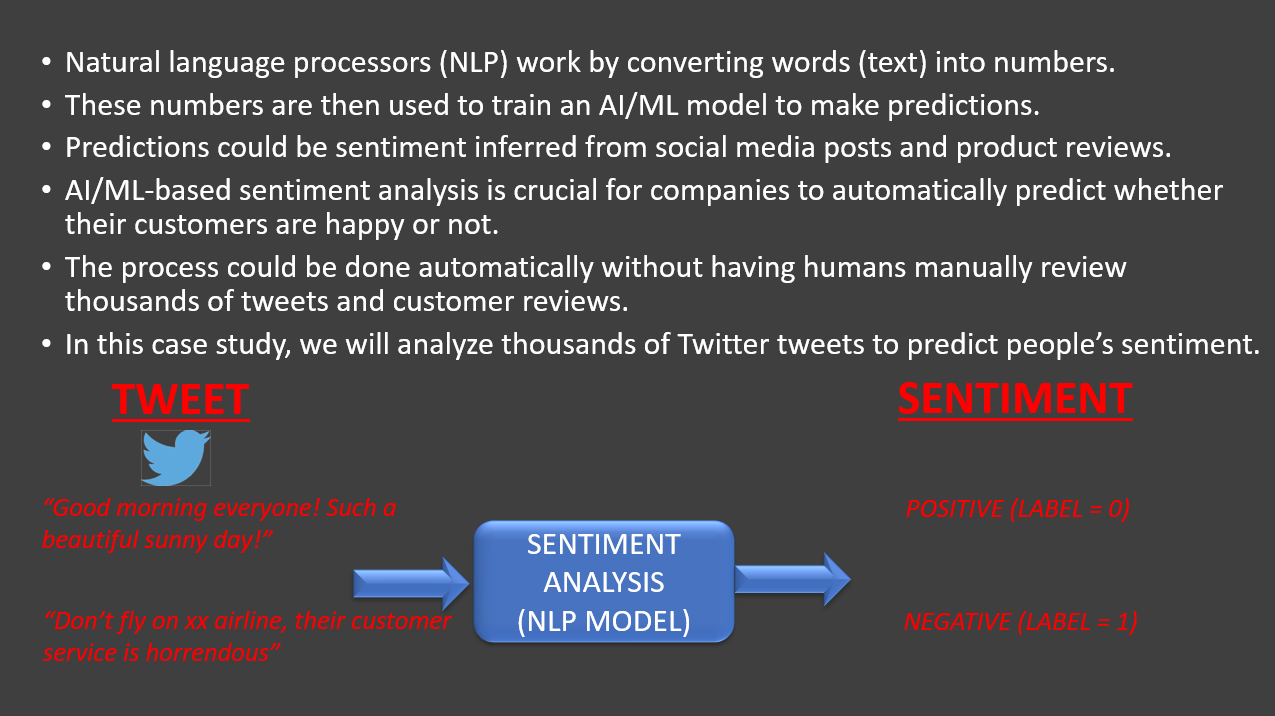

data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# Load the data
tweets_df = pd.read_csv('twitter.csv')


In [4]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

MINI CHALLENGE #1: 
- Drop the 'id' column from the DataFrame. 
- Ensure that the column has been succesfully dropped. 

In [8]:
tweets_df.drop('id',axis=1,inplace=True)

In [9]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# TASK #3: EXPLORE DATASET

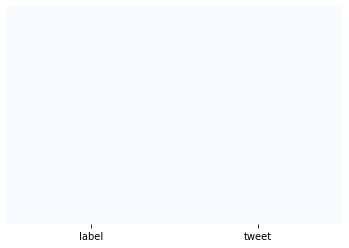

In [10]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190BBF81988>]],
      dtype=object)

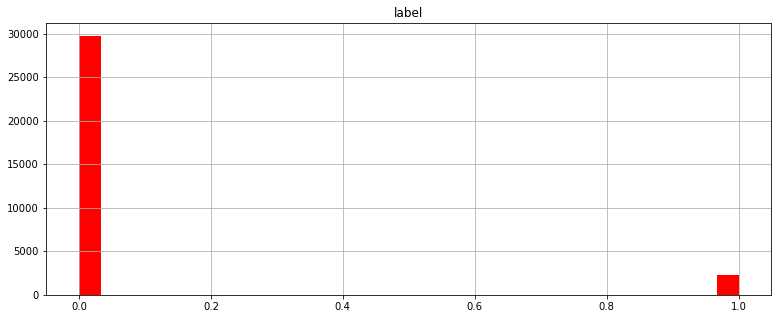

In [11]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2: 
- Plot similar figure using seaborn countplot

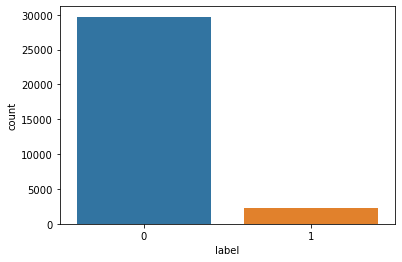

In [12]:
sns.countplot(tweets_df['label'], label = 'count')

In [13]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [14]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


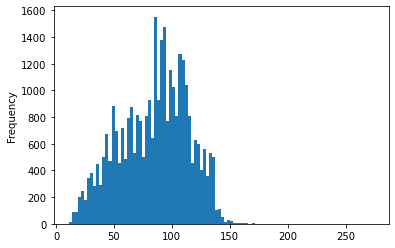

In [15]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [16]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [17]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

MINI CHALLENGE #3
- View the message with the average length

In [18]:
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [19]:
positive = tweets_df[tweets_df['label']==0]

In [20]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [21]:
negative = tweets_df[tweets_df['label']==1]

In [22]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# TASK #4: PLOT THE WORDCLOUD

In [23]:
sentences = tweets_df['tweet'].tolist()

In [24]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [25]:
len(sentences)

31962

In [26]:
sentences_as_one_string = " ".join(sentences)

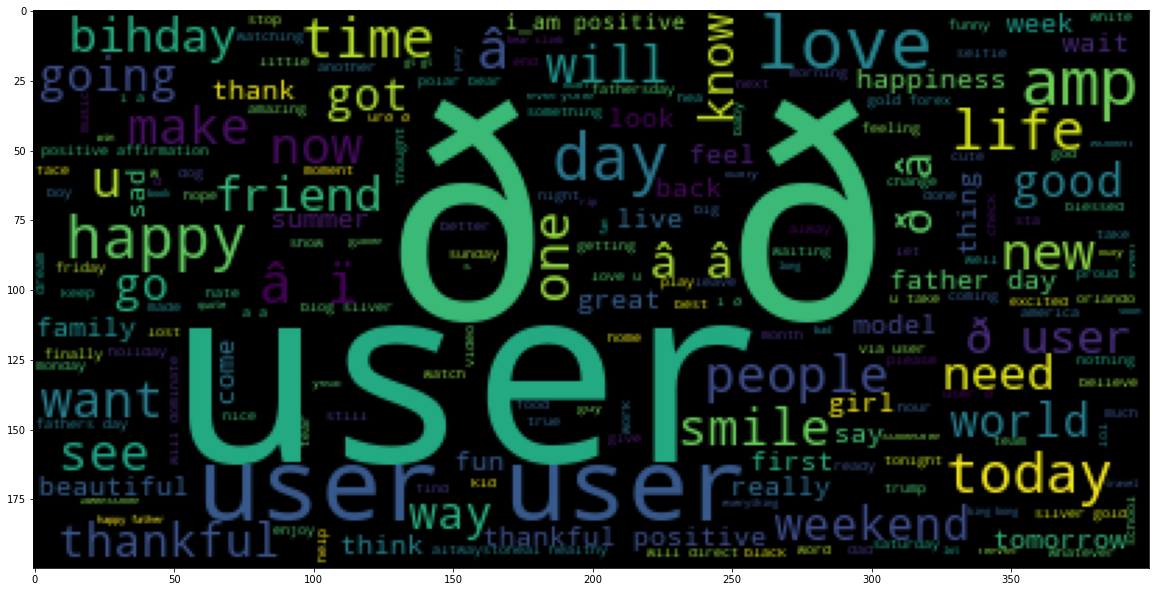

In [27]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

MINI CHALLENGE #4: 
- Plot the wordcloud of the "negative" dataframe. 
- What do you notice? Does the data make sense?

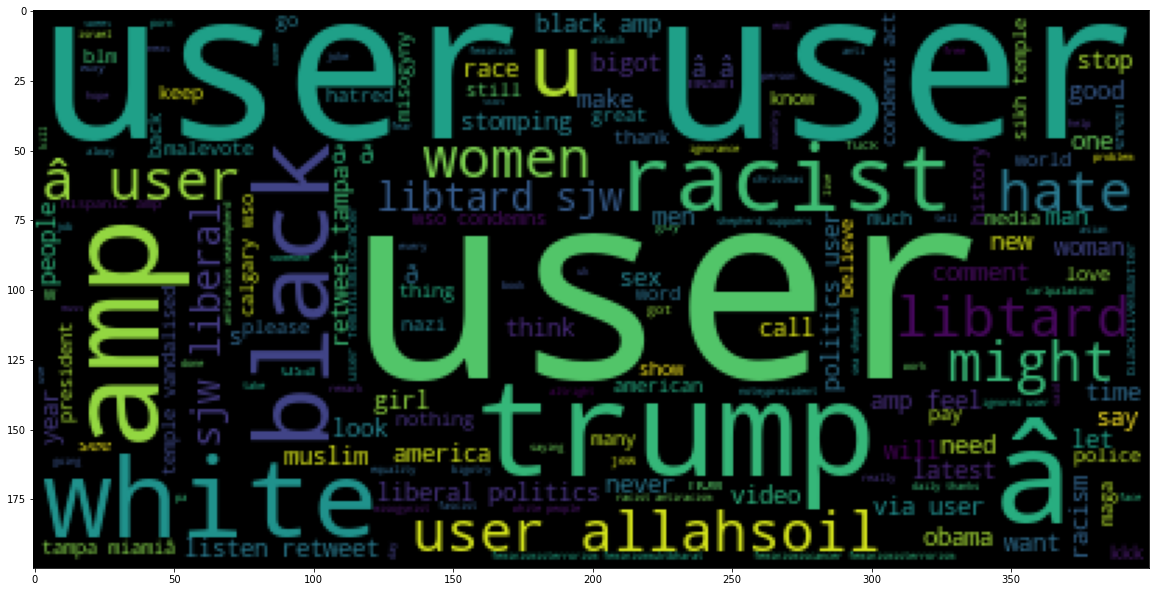

In [28]:
negative_sentences = negative['tweet'].tolist()
all_negatives = " ".join(negative_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(all_negatives))


# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [31]:
Test_punc_remove = [ char for char in Test if char not in string.punctuation ]

In [32]:
Test_punc_remove

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [33]:
# Join the characters again to form the string.
Test_pun_remove_join = ''.join(Test_punc_remove)
Test_pun_remove_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

MINI CHALLENGE #5: 
- Remove punctuations using a different method


# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [34]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\svman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
Test_pun_remove_join_clean = [word for word in Test_pun_remove_join.split() if word.lower() not in stopwords.words('english')]

In [37]:
Test_pun_remove_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [39]:
Test_pun_remove_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

MINI CHALLENGE #6: 
- For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [41]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [49]:
challenge = [char for char in mini_challenge if char not in string.punctuation]
challenge = ''.join(challenge)
challenge = [ word for word in challenge.split() if word.lower() not in stopwords.words('english')]
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

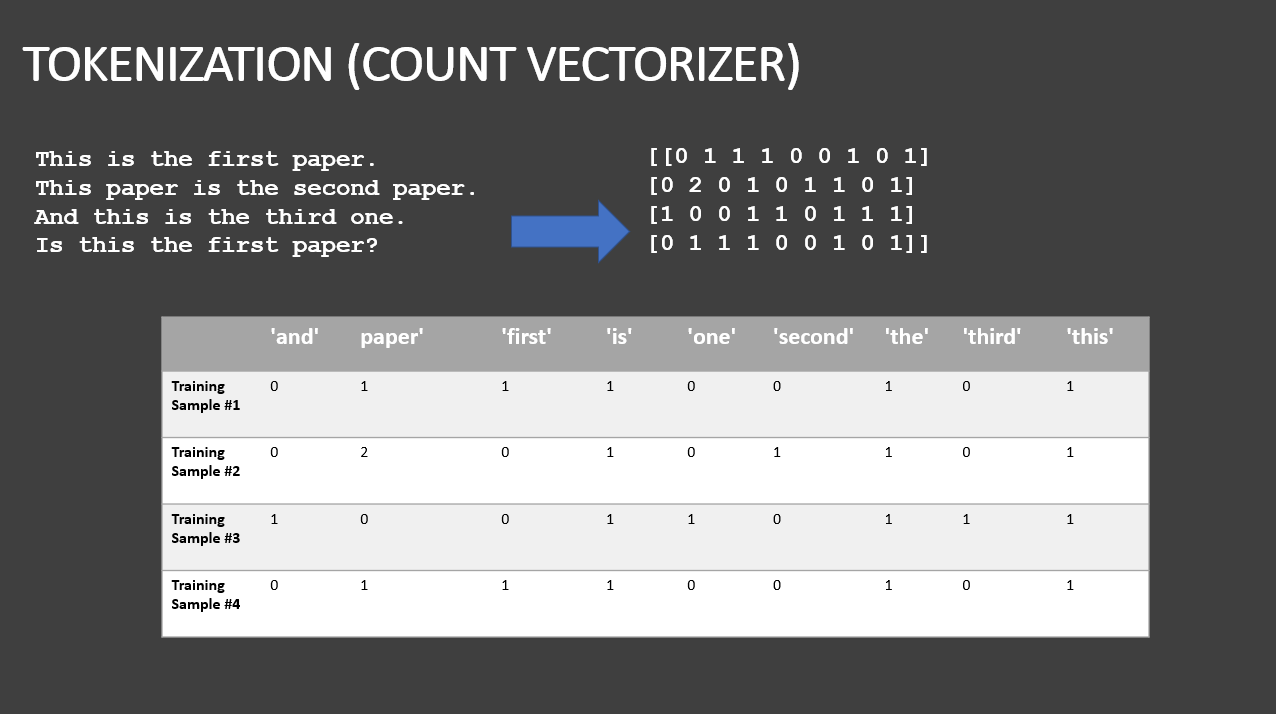

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [51]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [56]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


MINI CHALLENGE #7:
- Without doing any code, perform count vectorization for the following list:
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- Confirm your answer with code

In [60]:
mini_challenge = ['Hello World','Hello Hello World', 'Hello World world world']
vectorizer1 = CountVectorizer()
Y = vectorizer1.fit_transform(mini_challenge)
print(Y.toarray())

[[1 1]
 [2 1]
 [1 3]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [62]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [63]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [65]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [66]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [69]:
print(vectorizer.get_feature_names())


['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [70]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [71]:
tweets_countvectorizer.shape

(31962, 47386)

In [72]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [73]:
X = tweets


In [74]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y = tweets_df['label']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

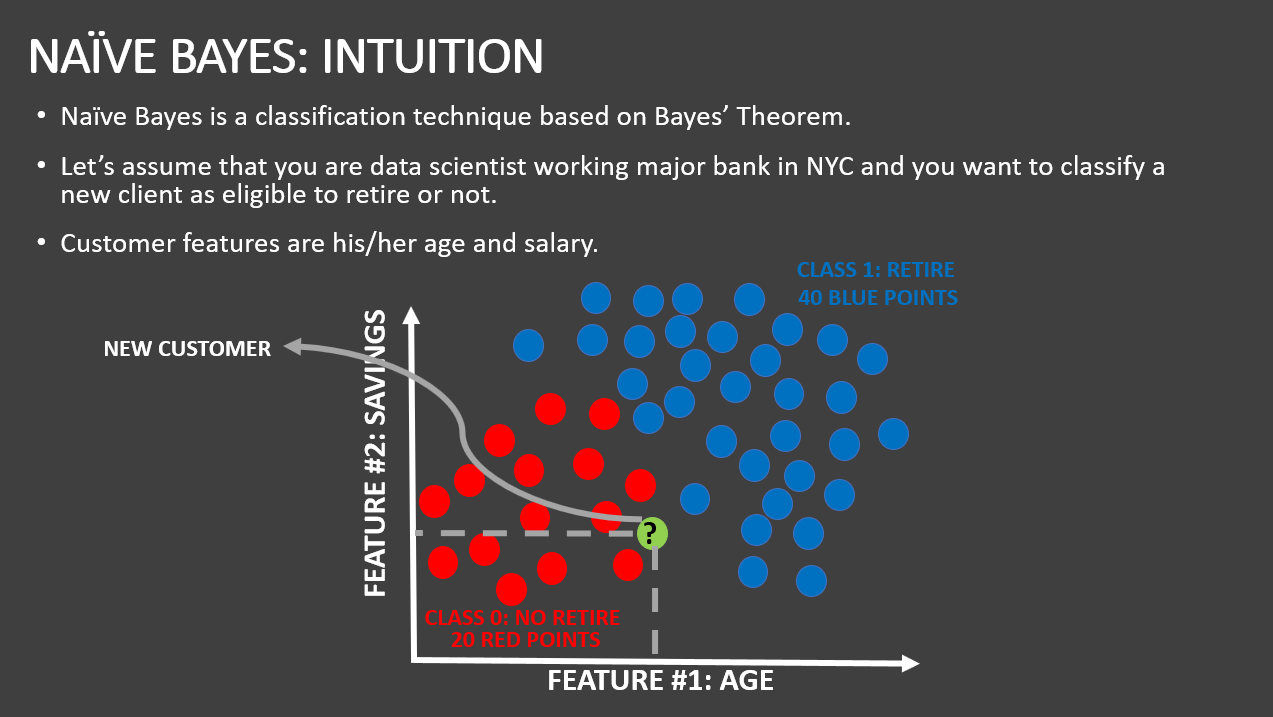

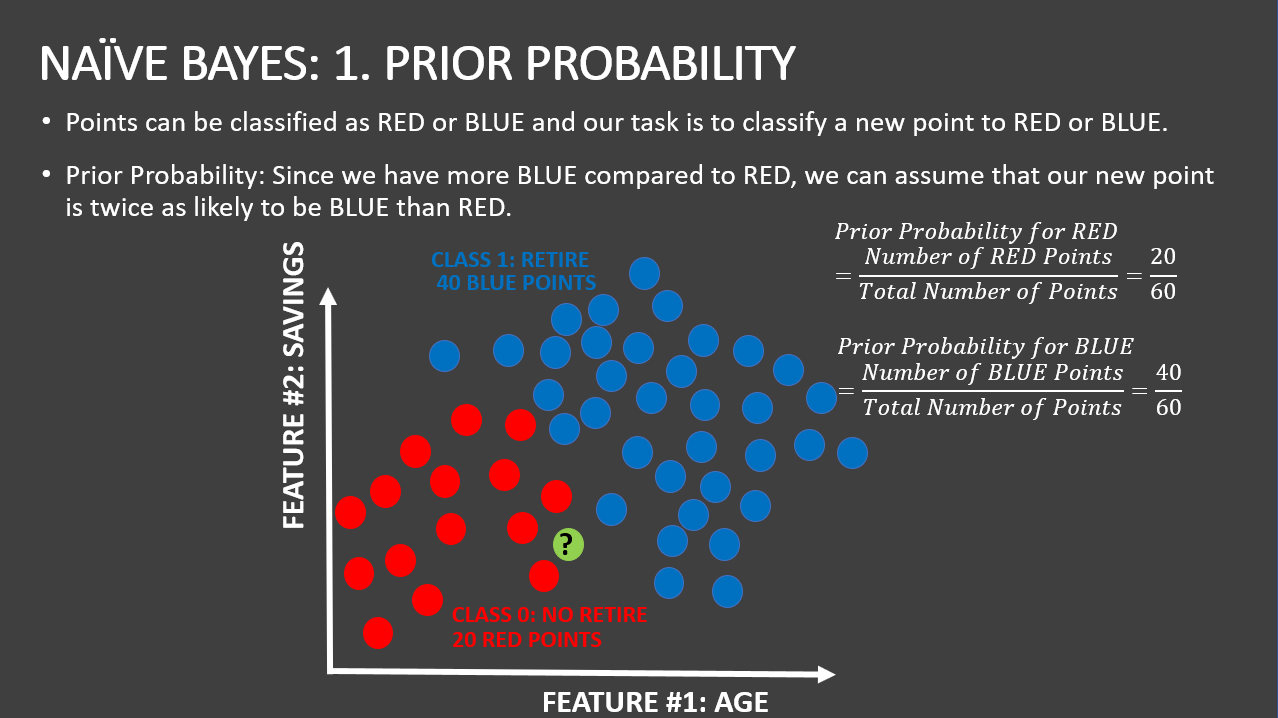

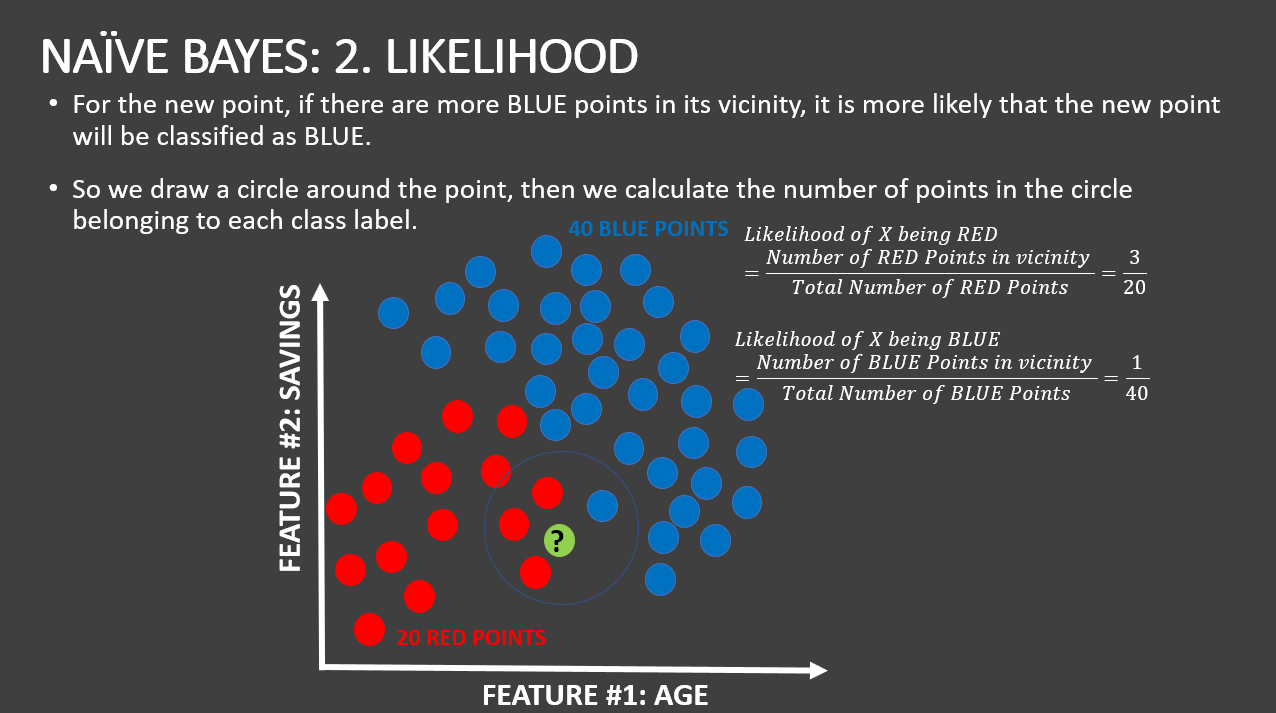

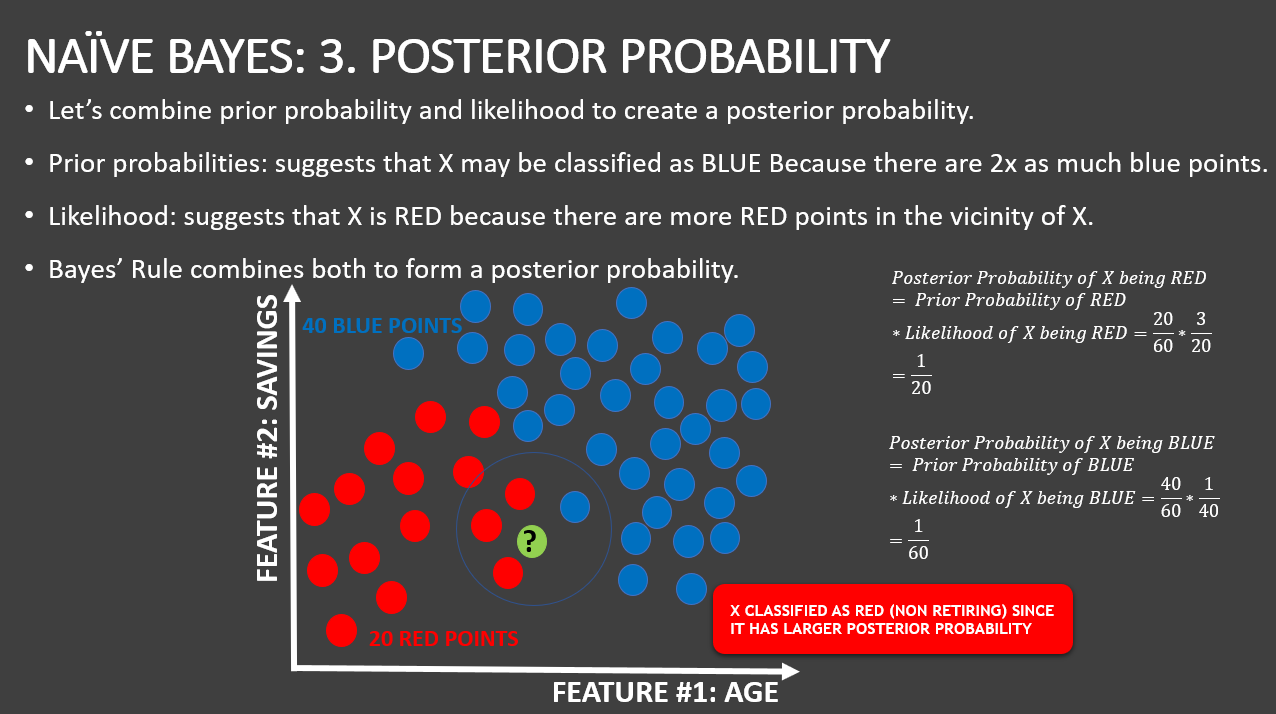

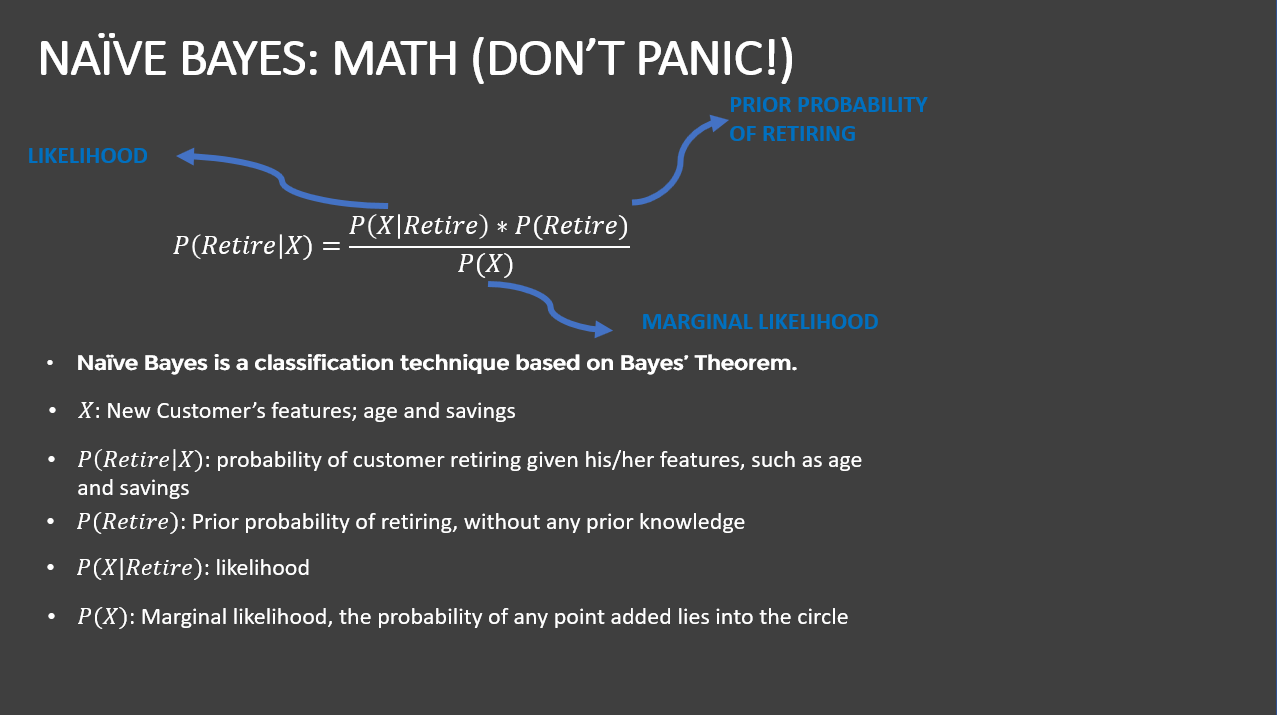

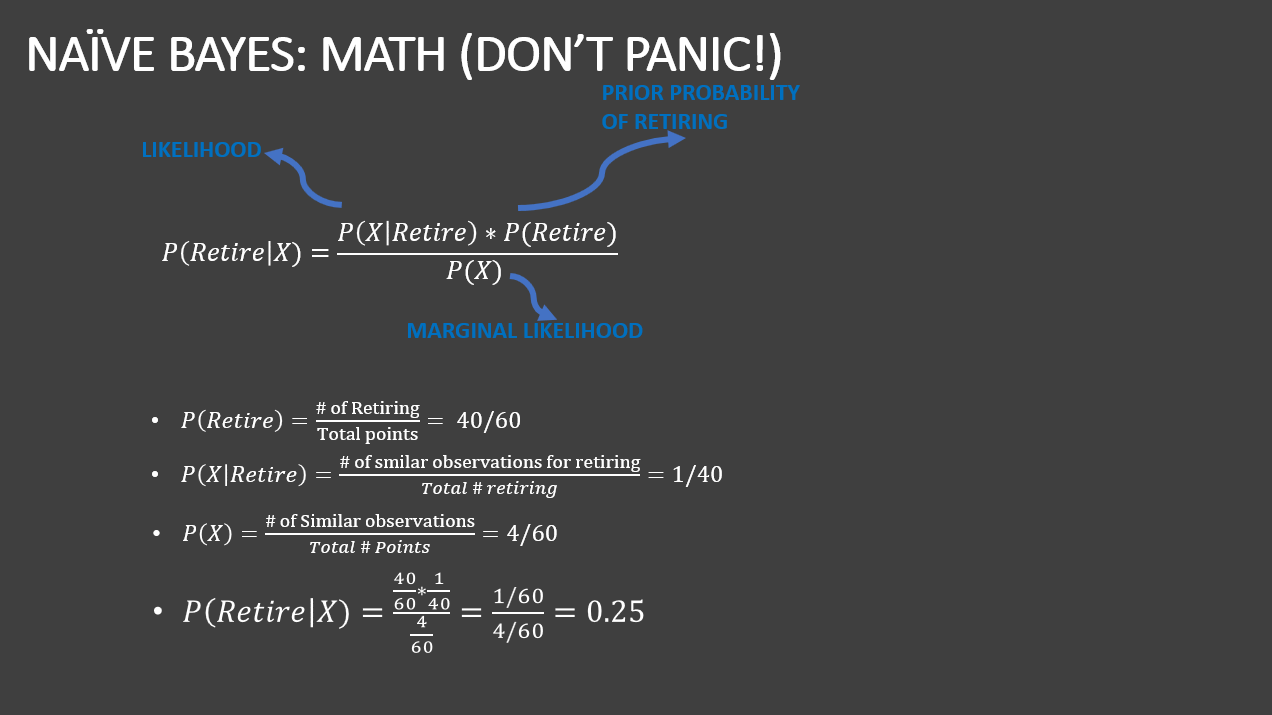

MINI CHALLENGE #8

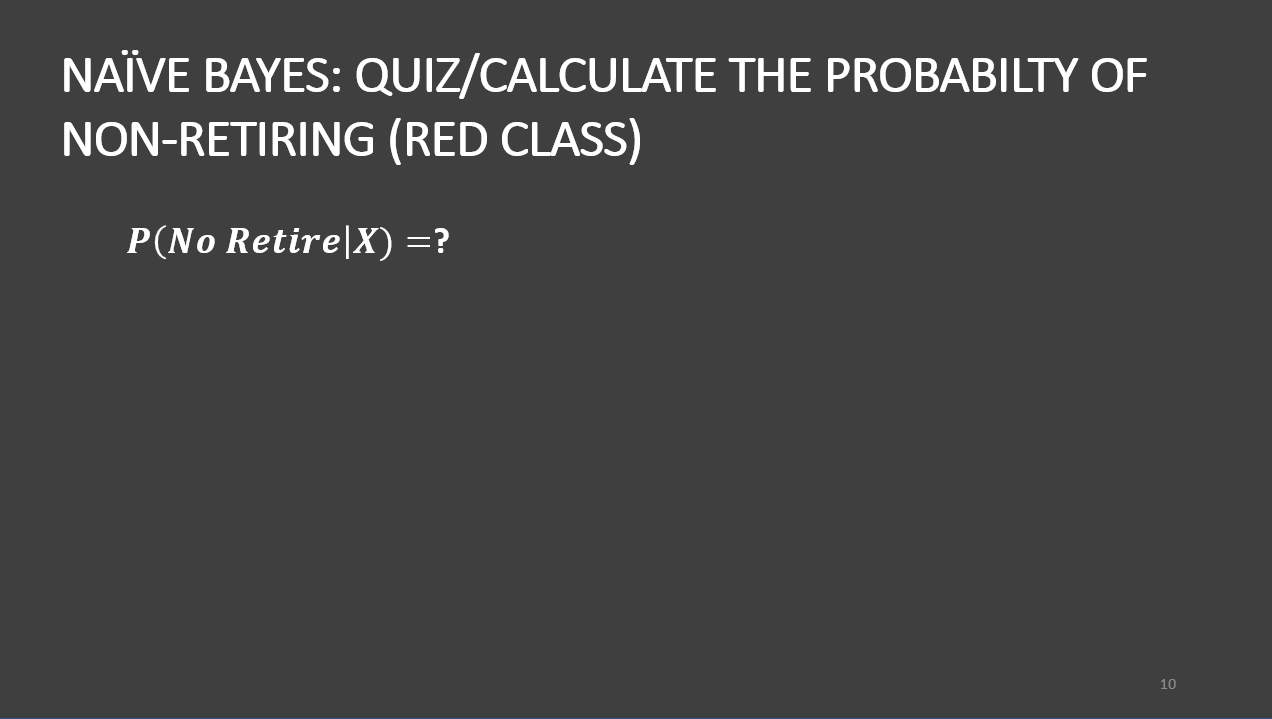

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [76]:
X.shape

(31962, 47386)

In [77]:
y.shape

(31962,)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

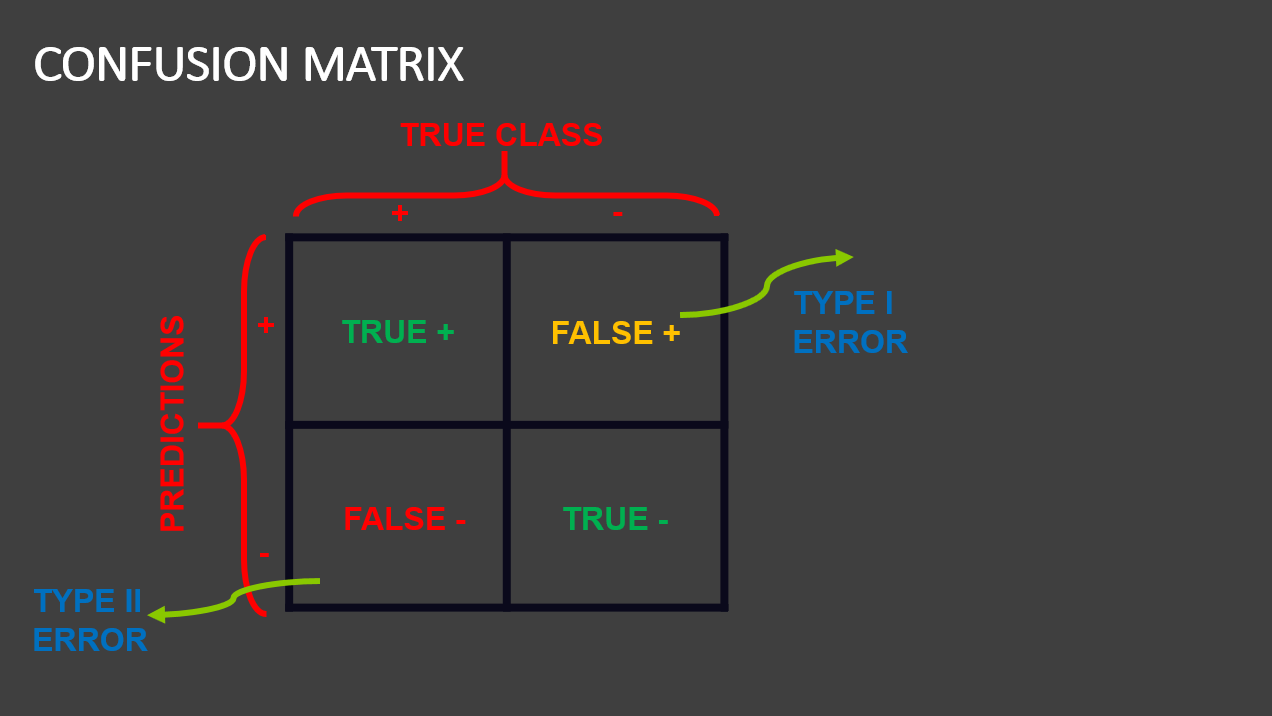

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

[[5743  162]
 [ 223  265]]


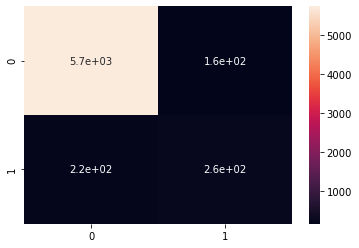

In [82]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(cm)

In [83]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5905
           1       0.62      0.54      0.58       488

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393



MINI CHALLENGE #9: 
- Retrain and reassess the model using a different type of classifier such as logistic regression classifier

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [ ]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

MINI CHALLENGE #2

In [ ]:
sns.countplot(tweets_df['label'], label = "Count") 

MINI CHALLENGE #3

In [ ]:
# Let's see the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

MINI CHALLENGE #4

In [ ]:
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

MINI CHALLENGE #5

In [ ]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

MINI CHALLENGE #6

In [ ]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

MINI CHALLENGE #7

In [61]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


MINI CHALLENGE #8

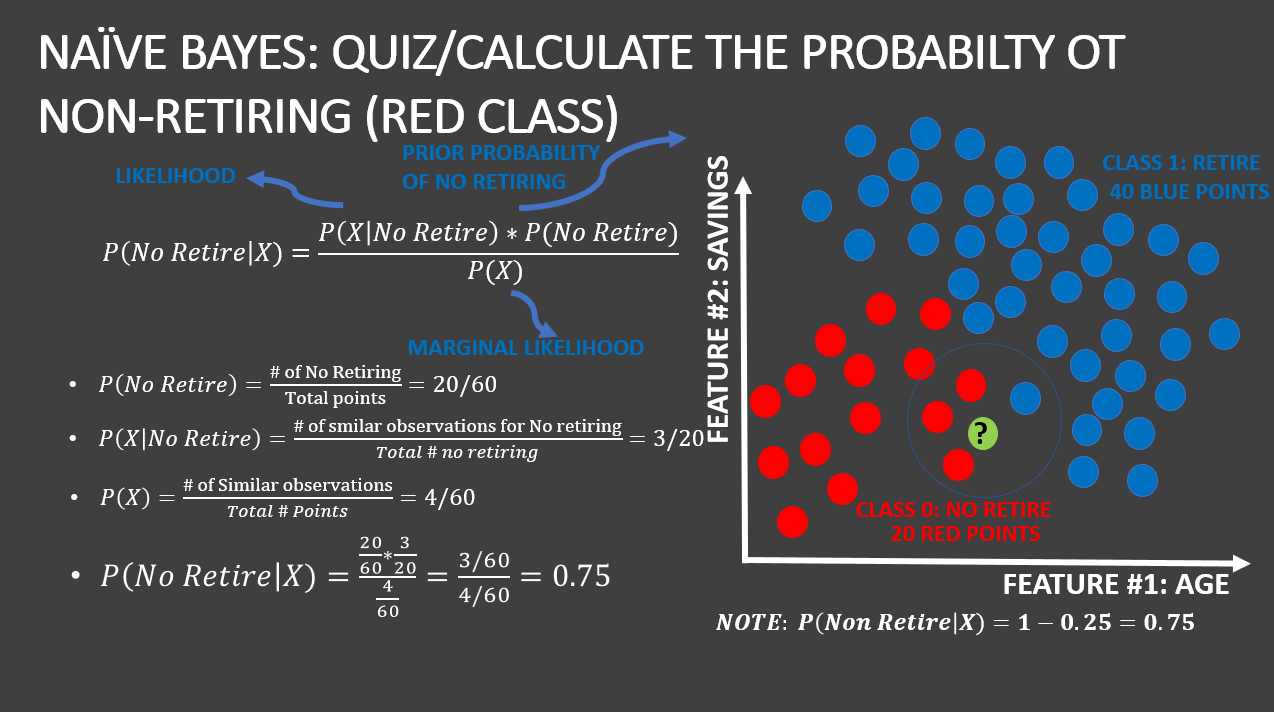